In [1]:
import pandas
import numpy
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
# Create this dataset with count_ids.sql
headers = ['county_no', 'year', 'id_count']
july_dataset = pandas.read_csv('../Data/SQL Output/july_id_counts.csv', names = headers)

In [13]:
july_counties = july_dataset.groupby('county_no').sum().reset_index()

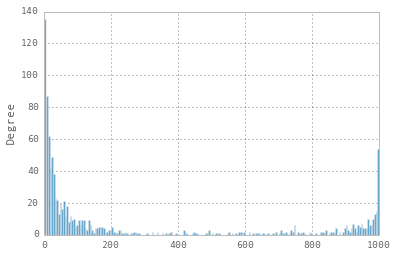

In [16]:
july_counties['id_count'].plot(kind = 'hist', alpha = 0.75, bins = 200, xlim = (0, 1000))

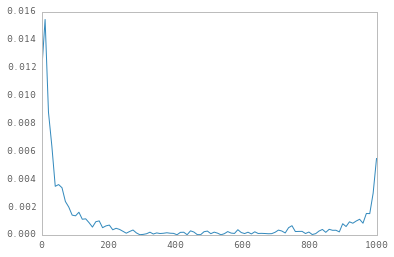

In [23]:
density = gaussian_kde(july_counties['id_count'])
xs = numpy.linspace(0, 1000, 100)
density.covariance_factor = lambda : .01
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

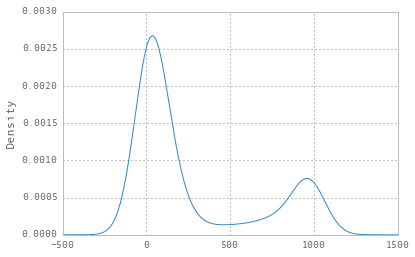

In [24]:
# Density plot - not great b/c tries to smooth curve and includes negative numbers
plot = july_counties['id_count'].plot(kind = 'kde')
fig = plot.get_figure()